## Case 2 - First trial

## 1. Objectives<br>
Objective of this assignemnt is to 

## 2. Import Libraries

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

import theano
theano.config.device = 'gpu'
theano.config.floatX = 'float32'
from keras import layers
from keras import models
from keras import optimizers
import time

from sklearn.metrics import roc_curve, roc_auc_score

from keras.applications import VGG16

MissingSectionHeaderError: File contains no section headers.
file: 'C:\\Users\\Euno/.theanorc', line: 1
'ï»¿[global]\n'

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


NameError: name 'theano' is not defined

In [5]:
import cv2, glob

def scaleRadius(img,scale):
    x=img[img.shape[0]/2,:,:].sum(1)
    r=(x>x.mean()/10).sum()/2
    s=scale * 1.0/r
    returncv2.resize(img,(0,0),fx=s,fy=s)
    
scale=300
for f in glob.glob("train/*.jpeg")+glob.glob("test/*.jpeg"):
    try:
        a=cv2.imread(f)
        #scaleimgtoagivenradius
        a=scaleRadius(a,scale)
        #subtractlocalmeancolor
        a=cv2.addWeighted(a,4,cv2.GaussianBlur(a,(0,0),scale/30), -4, 128)
        
    #remove outer 10%
        b = np.zeros(a.shape)
        cv2.circle(b,(a.shape[1]/2,a.shape[0]/2), int(scale* 0.9),(1,1,1), -1,8,0)
        a = a* b+128*(1-b)
        cv2.imwrite(str(scale)+"_"+f,a)
    except:
        print(f)

## 3. Building library


In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2333075563438551830
]


In [4]:
# Training parameters
batch_size = 32
epochs = 10
steps_per_epoch = 39 
validation_steps = 13
image_height = 150
image_width = 150 

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(image_height, image_width, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#show model layers and parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [5]:
print('number of trainable weights', len(model.trainable_weights))
conv_base.trainable = False
print('this is the number of trainable weights')
print('number of trainable weights', len(model.trainable_weights))

number of trainable weights 30
this is the number of trainable weights
number of trainable weights 4


In [6]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), #learning rate
              metrics=['acc'])

## 4. Data preprocessing
minimi on että on otsikko

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "dataset2\\train"
validation_dir = "dataset2\\validation"
test_dir = "dataset2\\test"

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = validation_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

#test data will not be manipulated. It's test as is.
test_datagen = ImageDataGenerator(rescale=1./255)

#training generator using the training data
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(image_height, image_width),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

#validation generator for to se how the model is training
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_height, image_width),
        batch_size=32,
        class_mode='binary')


model.save('case 2 combined.h5')

Found 1729 images belonging to 2 classes.
Found 749 images belonging to 2 classes.


In [9]:
#testing testing testing
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


## 5. Modeling

In [10]:
tStart = time.time()

#fitille mahdollisuus asettaa validaatioparametri. jos ei nouse enää korkeammalle, niin 

history = model.fit_generator(
      train_generator,
      steps_per_epoch=39, #
      verbose = 1, # show
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5)

tStop = time.time()
tElapsed = tStop - tStart
print('Time elapsed: {:.2f} sec'.format(tElapsed))

Epoch 1/20
39/39 [==============================] - 474s 12s/step - loss: 0.6212 - acc: 0.6857 - val_loss: 0.5870 - val_acc: 0.7063
Epoch 2/20
39/39 [==============================] - 371s 10s/step - loss: 0.5626 - acc: 0.7306 - val_loss: 0.6171 - val_acc: 0.6750
Epoch 3/20
39/39 [==============================] - 369s 9s/step - loss: 0.5440 - acc: 0.7364 - val_loss: 0.4691 - val_acc: 0.7688
Epoch 4/20
39/39 [==============================] - 337s 9s/step - loss: 0.5746 - acc: 0.7120 - val_loss: 0.4932 - val_acc: 0.7438
Epoch 5/20
39/39 [==============================] - 404s 10s/step - loss: 0.5365 - acc: 0.7220 - val_loss: 0.5021 - val_acc: 0.7447
Epoch 6/20
39/39 [==============================] - 376s 10s/step - loss: 0.5062 - acc: 0.7715 - val_loss: 0.5379 - val_acc: 0.7125
Epoch 7/20
39/39 [==============================] - 360s 9s/step - loss: 0.5786 - acc: 0.7272 - val_loss: 0.5185 - val_acc: 0.7250
Epoch 8/20
39/39 [==============================] - 444s 11s/step - loss: 0.502

In [11]:
# fires etest with very few ecpos and small batch sizes
print('Elapset time {:.2f} hours.'.format((tStop-tStart)/3600)) 
print('Time perc epoch {:.2f} minutes.'.format((tStop-tStart)/50/60))
model.save('case2_run_2.h5') 

Elapset time 2.08 hours.
Time perc epoch 2.50 minutes.


## Results

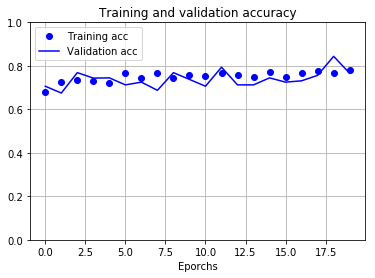

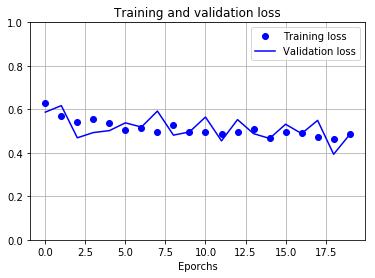

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylim([0, 1])
plt.grid()
plt.xlabel('Eporchs')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylim([0, 1])
plt.grid()
plt.xlabel('Eporchs')
plt.legend()

plt.show()

## Test the model



In [13]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

r = model.evaluate_generator(test_generator, steps=21)

#loss and accuracy
r

Found 735 images belonging to 2 classes.


[0.46192447273504167, 0.79047618877320058]

## Predict the score

In [14]:
#initialize values
y_true = np.zeros(735)
y_score = np.zeros(735)
sample_count = 735

i = 0
for inputs_batch, labels_batch in test_generator:
    predicts_batch = model.predict(inputs_batch)
    L = labels_batch.shape[0]
    index = range(i, i + L)
    y_true[index] = labels_batch.ravel()
    y_score[index] = predicts_batch.ravel()
    i = i + L
    if i >= sample_count:
        break

## calculate ROC and AUC

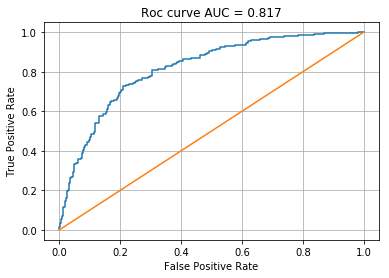

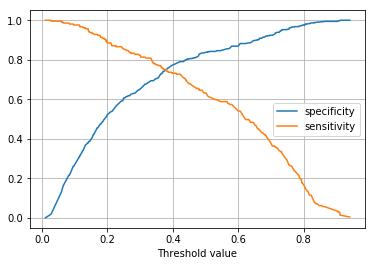

In [15]:
fpr, tpr, thresholds = roc_curve(y_true, y_score)
auc = roc_auc_score(y_true, y_score)

#plotting the ROC / AOC 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1]), [0, 1, '--']
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve AUC = {:.3f}'.format(auc))
plt.show()

#plotting sensitivity and specificity
plt.figure()
plt.plot(thresholds, 1-fpr, label = 'specificity')
plt.plot(thresholds, tpr, label = 'sensitivity')
plt.legend()
plt.grid()
plt.xlabel('Threshold value')
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [16]:
# select the threshold to maximize botth specifity and sensitivity
th = 0.37
th

0.37

In [22]:
#bulding the confusion matrix
acc = accuracy_score(y_true, y_score > th)
prec = precision_score(y_true, y_score > th)
f1 = f1_score(y_true, y_score > th)
recall = recall_score(y_true, y_score > th)

#print('acc: {:,3f}'.format(acc))
#print('prec: {:, 3f}',format(prec))
#print('f1:   {:, 3f}',format(f1))
#print('recc: {:, 3f}'.format(recall))

In [23]:
print('classification report')
print(classification_report(y_true, y_score > th, labels = [1.0, 0.0], target_names = ['Disease', 'Healthy']))

classification report
             precision    recall  f1-score   support

    Disease       0.54      0.76      0.63       209
    Healthy       0.88      0.74      0.81       526

avg / total       0.78      0.74      0.75       735



Recall diesase = sensistivity: 77%
recall (Healthy) = specifity: 75%

In [24]:
tn, fp, fn, tp = confusion_matrix(y_true, y_score > th).ravel()

print('                    Confusion matrix')
print()
print('                     Positive Negative      Sum')
print('Predicted | Positive {:8} {:8} {:8}'.format(tp, fp, tp + fp))
print('Condition | Negative {:8} {:8} {:8}'.format(fn, tn, fn + tn))
print('                 Sum {:8} {:8} {:8}'.format(tp + fn, fp + tn, tp + fp + fn + tn))
print()

print('sensitivity {:.3f}'.format(tp/(tp+fn)))
print('specificity {:.3f}'.format(tn/(tn+fp)))

                    Confusion matrix

                     Positive Negative      Sum
Predicted | Positive      158      137      295
Condition | Negative       51      389      440
                 Sum      209      526      735

sensitivity 0.756
specificity 0.740


Sensitivity